<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
[Ejemplo similar en Pytorch](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=m_mRflxPl32F)

max_length = 200

In [1]:
!pip install transformers --quiet

In [2]:
import tensorflow
from transformers import TFBertModel

### Definiendo modelo

In [3]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
max_length = 100
output_shape = 3

In [5]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 100)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 100)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 100, 7                                       

In [7]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [8]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  131k  100  131k    0     0  35428      0  0:00:03  0:00:03 --:--:--  102k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 7002k  100 7002k    0     0  1637k      0  0:00:04  0:00:04 --:--:-- 3420k


In [9]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [10]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


Cantidad de críticas: 15746


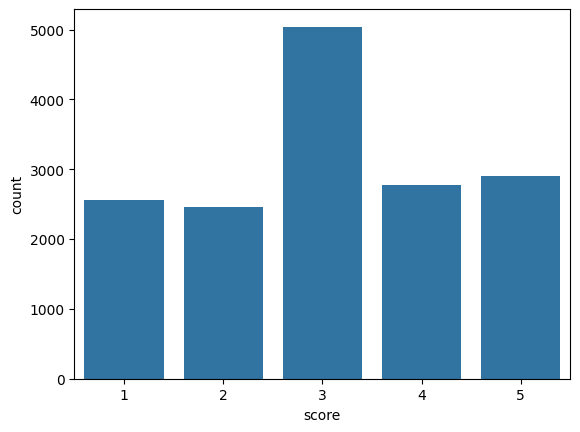

In [11]:
import pandas as pd
import seaborn as sns  # Import seaborn with the 'sns' alias
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Armar el dataset
df = pd.read_csv('reviews.csv')

print("Cantidad de críticas:", len(df))

# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)
plt.show()  # Display the plot

## Limpieza de datos

In [12]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

<ipython-input-13-15c40b0fa175>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names);


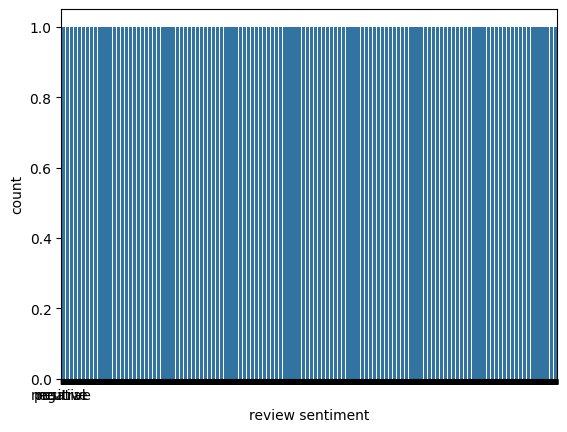

In [13]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [14]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


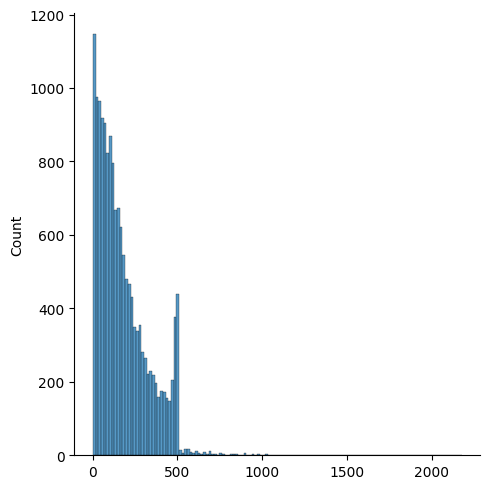

In [15]:
import numpy as np # Add this line to import numpy
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## 1 - Data generator


In [18]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer
import numpy as np

In [19]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [20]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [21]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [22]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [23]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [24]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [25]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [26]:
y_test = y[idx_test]

## 2 - BERT multiclass classification

In [28]:
# Import necessary libraries
import tensorflow as tf
import numpy as np


# Assuming you want to use a simple sequential model as an example
# Get the shape of the input data
input_shape = np.shape(X_test[0])[1]  # Assuming X_test is a list or array containing your input data

# Define the number of classes in your problem
num_classes = 3  # Replace with the actual number of classes

model1 = tf.keras.models.Sequential([
    # Add your desired layers here
    # Example:
    tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)), # input_shape is now defined
    tf.keras.layers.Dense(num_classes, activation='softmax') # Replace num_classes with the number of classes in your problem
])

# Compile the model
model1.compile(optimizer='adam', # You can choose a different optimizer
              loss='categorical_crossentropy', # Choose the appropriate loss function for your problem
              metrics=['accuracy']) # Add any other metrics you want to track

# Now you can train the model
history1 = model1.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    315/Unknown 7s 17ms/step - accuracy: 0.3407 - loss: 1.1115

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


315/315 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.3408 - loss: 1.1115 - val_accuracy: 0.3694 - val_loss: 1.0936
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3532 - loss: 1.0978 - val_accuracy: 0.3738 - val_loss: 1.0910
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3642 - loss: 1.0938 - val_accuracy: 0.3528 - val_loss: 1.0932
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3639 - loss: 1.0922 - val_accuracy: 0.3659 - val_loss: 1.0929
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3697 - loss: 1.0916 - val_accuracy: 0.3659 - val_loss: 1.0935


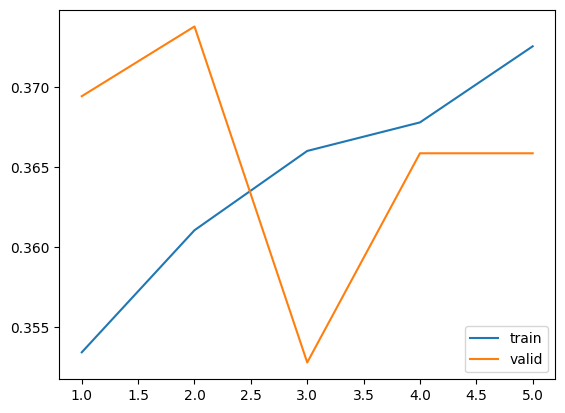

In [29]:
plot_train_metrics(history1)

In [30]:
y_hat_prob = model1.predict(X_test)
y_hat_prob[:3]

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.99868673, 0.        , 0.00131323]], dtype=float32)

In [31]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [32]:
# Calcular la exactitud (accuracy)
scores = model1.evaluate(X_test, y_test)
scores[1]

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3557 - loss: 1181.0549


0.36698412895202637

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3557 - loss: 1181.0549
Accuracy: 0.36698412895202637


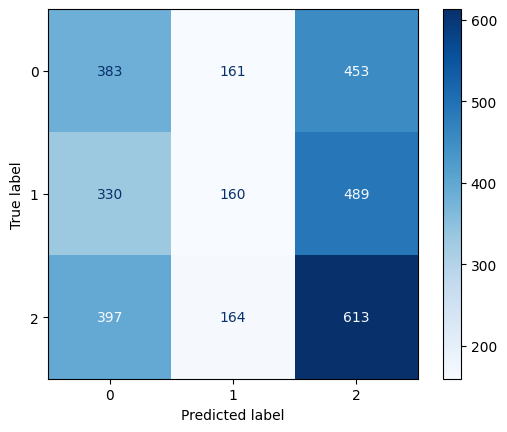

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ... (Your other imports and code, including model1 definition and training) ...

# 1. Predict probabilities:
y_hat_prob = model1.predict(X_test)

# 2. Get predicted labels:
y_hat = np.argmax(y_hat_prob, axis=1)

# 3. Calculate accuracy (if needed):
scores = model1.evaluate(X_test, y_test)
print(f"Accuracy: {scores[1]}")  # Print the accuracy

# 4. Plot the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)

# *** FIX: Get the number of unique classes from your predictions ***
num_classes = len(np.unique(y_hat))

# *** FIX: Use the correct number of labels ***
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(num_classes)))

cmd.plot(cmap=plt.cm.Blues)
plt.show()

## 3 - BERT Fine tuning

In [34]:
!pip install tensorflow
import tensorflow as tf
import keras

model2 = model1

# Colocar todas las layers como entrenables
for layer in model2.layers:
    layer.trainable = True

# Como es fine tunning se recomiendo utiliza al menos un learning rate 100 veces
# menor
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), # Now using the fully qualified name
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │          18,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,435 (72.01 KB)

 Trainable params: 18,435 (72.01 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history2 = model2.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
    315/Unknown 9s 21ms/step - accuracy: 0.3713 - loss: 1.0894

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.3713 - loss: 1.0894 - val_accuracy: 0.3635 - val_loss: 1.0924
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.3787 - loss: 1.0886 - val_accuracy: 0.3603 - val_loss: 1.0918
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.3683 - loss: 1.0882 - val_accuracy: 0.3587 - val_loss: 1.0914
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.3716 - loss: 1.0878 - val_accuracy: 0.3579 - val_loss: 1.0913
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3760 - loss: 1.0876 - val_accuracy: 0.3583 - val_loss: 1.0912


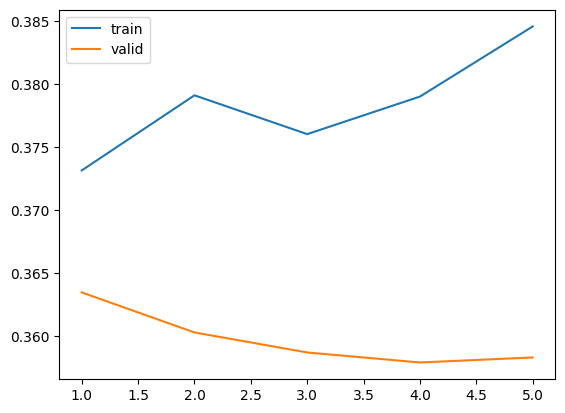

In [36]:
plot_train_metrics(history2)

In [37]:
y_hat_prob2 = model2.predict(X_test)
y_hat_prob2[:3]

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.000000e+00, 0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00],
       [5.404275e-09, 2.603195e-26, 1.000000e+00]], dtype=float32)

In [38]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [39]:
# Calcular la exactitud (accuracy)
scores = model1.evaluate(X_test, y_test)
scores[1]

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3520 - loss: 1162.7369


0.3603174686431885

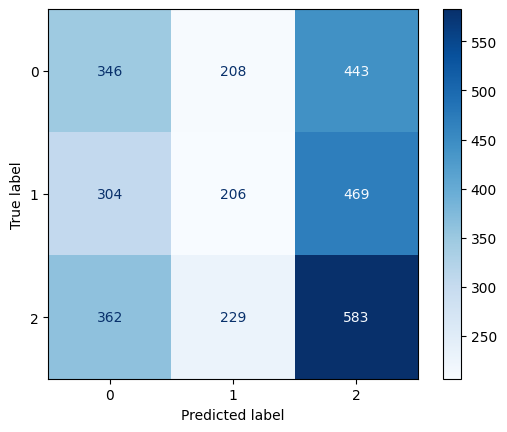

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_hat2 are your true and predicted labels respectively

# Get the unique classes from your true labels
n_classes = len(np.unique(y_test.argmax(axis=1)))

# Create the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_hat2)

# Create the ConfusionMatrixDisplay object with the correct number of labels
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(n_classes)))

# Plot the confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## Salvar el modelo

In [41]:
model2.save_weights('bert_weights.weights.h5') # Changed the filename to include .weights.h5

In [42]:
# Descargar los pesos a nuestra PC
# Solo es necesario si se desea repetir el uso de este modelo en el futuro
from google.colab import files
# Change the filename to match the name used when saving the weights
files.download('bert_weights.weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Levantar el modelo

In [43]:
bert_model3 = TFBertModel.from_pretrained("bert-base-uncased")

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input((max_length,), dtype=tensorflow.int32, name='attention_mask')

# Wrap the BERT call in a Lambda layer to convert KerasTensors to TensorFlow Tensors
# Specify the output_shape for the Lambda layer
embeddings = tensorflow.keras.layers.Lambda(
    lambda inputs: bert_model3(inputs[0], attention_mask=inputs[1])[0],
    output_shape=(max_length, bert_model3.config.hidden_size)  # Add output_shape here
)([input_ids, attention_mask])

# Apply dropout
output = tensorflow.keras.layers.Dropout(rate=0.2)(embeddings)

# Add a Dense layer
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(output)

# Final model
model3 = tensorflow.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [44]:
# Check the layers of your model to verify the expected structure.
for layer in model3.layers:
    print(layer.name, layer.count_params())

# If your model was saved with a custom name, try using "by_name=True"
# in the load_weights function to ignore structural differences:
# model3.load_weights('/content/sample_data/bert_weights.weights_100.h5', by_name=True)

# If there is a structural mismatch, you need to adjust your model
# to match the architecture used to save the weights in the HDF5 file.
# Or retrain the model and save the weights.

input_ids 0
attention_mask 0
lambda 0
dropout 0
dense_3 2307


In [45]:
# Assuming output_shape is the number of classes in your classification task
output_shape = 140  # Or your desired output shape

bert_model3 = TFBertModel.from_pretrained("bert-base-uncased")

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input((max_length,), dtype=tensorflow.int32, name='attention_mask')

# Wrap the BERT call in a Lambda layer to convert KerasTensors to TensorFlow Tensors
# Specify the output_shape for the Lambda layer
embeddings = tensorflow.keras.layers.Lambda(
    lambda inputs: bert_model3(inputs[0], attention_mask=inputs[1])[0],
    output_shape=(max_length, bert_model3.config.hidden_size)  # Add output_shape here
)([input_ids, attention_mask])

# Apply

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

## Ensayo

In [46]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [47]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [49]:
y_prob_ensayo = model3.predict(X_ensayo)
# Get the index of the predicted class for the first sample
y_prob = np.argmax(y_prob_ensayo[0], axis=-1)  # Assuming you want the prediction for the first sample

# Get the most frequent predicted class
predicted_class_index = int(np.bincount(y_prob).argmax())

# Ensure the index is within the bounds of class_names
if predicted_class_index < len(class_names):
    print("Clasificación:", class_names[predicted_class_index])
else:
    print(f"Warning: Predicted class index {predicted_class_index} is out of range for class_names. Check your model and data.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Clasificación: neutral
